# Import Relevant Data

In [ ]:
import pandas as pd
import ast
import numpy as np
import math
import time
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt 
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [ ]:
df_cryp=pd.read_csv('https://raw.githubusercontent.com/SunYutongAmber/SignatureWork/main/Data/2017to2022_rarity_gas_usd_price.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,skin_tone_color,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
1,1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,...,#F2DC5D,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41
2,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
3,3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22
4,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17822,17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,...,#DB9065,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97
17823,17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,...,#F2A359,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55
17824,17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,...,#A4031F,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68


# Cryptopunk Price(USD)

In [ ]:
df_cryp['Price']=np.array(df_cryp['eth_price'])*np.array(df_cryp['eth_usd_price'])
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,img_url,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,timestamp,date_y,gas_eth_price,date,eth_usd_price,Price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,9.8055
1,1,1,2017-07-03,1218,3828,0.49,6548,Human,Male,Albino,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.158689,3.635788,0.000000,1.499040e+09,1499040000,1.180929e+08,1499040000,276.41,135.4409
2,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,13.0740
3,3,3,2019-03-20,920,1472,0.99,5719,Human,Female,Medium,...,https://www.larvalabs.com/cryptopunks/cryptopu...,48.311485,20.756003,891.396281,1.553040e+09,1553040000,5.115253e+07,1553040000,140.22,138.8178
4,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,https://www.larvalabs.com/cryptopunks/cryptopu...,8.104202,4.654820,69.188677,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,81.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17821,17821,2022-07-17,2292,2070,88.88,4656,Human,Female,Medium,...,https://www.larvalabs.com/cryptopunks/cryptopu...,21.880604,12.483109,67.515097,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,118918.7736
17822,17822,17822,2022-07-17,5922,916,88.00,4749,Human,Male,Medium,...,https://www.larvalabs.com/cryptopunks/cryptopu...,6.622251,5.319922,144.347171,1.658016e+09,1658016000,1.046061e+08,1658016000,1337.97,117741.3600
17823,17823,17823,2022-07-18,107,1044,84.00,4569,Human,Male,Light,...,https://www.larvalabs.com/cryptopunks/cryptopu...,4.402877,3.774773,52.620913,1.658102e+09,1658102400,1.475703e+08,1658102400,1583.55,133018.2000
17824,17824,17824,2022-07-21,244,801,86.68,4755,Human,Male,Dark,...,https://www.larvalabs.com/cryptopunks/cryptopu...,5.721903,3.182949,0.000000,1.658362e+09,1658361600,1.027865e+08,1658361600,1575.68,136579.9424


# Volume of Active Market Wallet & Daily Change Rate

In [ ]:
df_group=df_cryp.groupby('date_x').count()
active_wallet=np.array(df_group['Unnamed: 0'])*2
df_wallet=DataFrame({"active_wallet": active_wallet,
                     "date":df_group.index})
df_wallet

,active_wallet,date
0,34,2017-06-23
1,34,2017-06-24
2,24,2017-06-25
3,10,2017-06-26
4,46,2017-06-27
...,...,...
1364,4,2022-07-22
1365,4,2022-07-23
1366,12,2022-07-25
1367,6,2022-07-26


In [ ]:
df_wallet['active_wallet_shift']=df_wallet['active_wallet'].shift(1)
df_wallet['active_wallet_shift'][0]=3
df_wallet

<ipython-input-5-51ec93477ae8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wallet['active_wallet_shift'][0]=3


,active_wallet,date,active_wallet_shift
0,34,2017-06-23,3.0
1,34,2017-06-24,34.0
2,24,2017-06-25,34.0
3,10,2017-06-26,24.0
4,46,2017-06-27,10.0
...,...,...,...
1364,4,2022-07-22,4.0
1365,4,2022-07-23,4.0
1366,12,2022-07-25,4.0
1367,6,2022-07-26,12.0


In [ ]:
wallet_change=(np.array(df_wallet['active_wallet'])-np.array(df_wallet['active_wallet_shift']))/np.array(df_wallet['active_wallet_shift'])
df_wallet['wallet_change']=wallet_change
df_wallet['wallet_change']

0       10.333333
1        0.000000
2       -0.294118
3       -0.583333
4        3.600000
          ...    
1364     0.000000
1365     0.000000
1366     2.000000
1367    -0.500000
1368    -0.333333
Name: wallet_change, Length: 1369, dtype: float64

In [ ]:
df_cryp=df_cryp.merge(df_wallet, left_on='date_x', right_on='date')

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: Passing 'suffixes' which cause duplicate columns {'date_x'} in the result is deprecated and will raise a MergeError in a future version.
  return merge(


In [ ]:
df_cryp.to_csv('wallet_rarity_usd_gas_merged.csv')
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,Price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,9.8055,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,13.0740,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,81.7125,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,98.0550,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,65.3700,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,238948.7584,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,106728.2352,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,99409.5040,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,100798.8888,6,2022-05-20,12.0,-0.500000


# Volume of Cryptopunks Sales Daily Change Rate

In [ ]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,timestamp,date_y,gas_eth_price,date_x,eth_usd_price,Price,active_wallet,date_y,active_wallet_shift,wallet_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,9.8055,34,2017-06-23,3.0,10.333333
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,13.0740,34,2017-06-23,3.0,10.333333
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,81.7125,34,2017-06-23,3.0,10.333333
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,98.0550,34,2017-06-23,3.0,10.333333
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,1.498176e+09,1498176000,1.720330e+08,1498176000,326.85,65.3700,34,2017-06-23,3.0,10.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,1.644970e+09,1644969600,3.597364e+08,1644969600,3124.33,238948.7584,2,2022-02-16,4.0,-0.500000
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,106728.2352,6,2022-05-20,12.0,-0.500000
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,99409.5040,6,2022-05-20,12.0,-0.500000
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1.653005e+09,1653004800,1.376851e+08,1653004800,1956.88,100798.8888,6,2022-05-20,12.0,-0.500000


In [ ]:
sales=df_cryp.groupby('timestamp')['Price'].sum()
sales

timestamp
1.498176e+09       681.155400
1.498262e+09      1089.035040
1.498349e+09       487.969336
1.498435e+09       208.017854
1.498522e+09      1843.610860
                    ...      
1.658448e+09    271820.670000
1.658534e+09    306739.620000
1.658707e+09    590159.304000
1.658794e+09    373854.419000
1.658880e+09    285864.723200
Name: Price, Length: 1369, dtype: float64

In [ ]:
df_sales=DataFrame({'daily_sales':sales,
                    'date_z':df_group.index})
df_sales

,daily_sales,date_z
timestamp,,
1.498176e+09,681.155400,2017-06-23
1.498262e+09,1089.035040,2017-06-24
1.498349e+09,487.969336,2017-06-25
1.498435e+09,208.017854,2017-06-26
1.498522e+09,1843.610860,2017-06-27
...,...,...
1.658448e+09,271820.670000,2022-07-22
1.658534e+09,306739.620000,2022-07-23
1.658707e+09,590159.304000,2022-07-25


In [ ]:
df_sales['sales_shift']=df_sales['daily_sales'].shift(1)
df_sales['sales_shift'][0]=0.42
change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])
change_sales

<ipython-input-12-c0bd02db3cfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['sales_shift'][0]=0.42
<ipython-input-12-c0bd02db3cfe>:3: RuntimeWarning: divide by zero encountered in true_divide
  change_sales=(np.array(df_sales['daily_sales'])-np.array(df_sales['sales_shift']))/np.array(df_sales['sales_shift'])


array([ 1.62079857e+03,  5.98805559e-01, -5.51925036e-01, ...,
        9.23974816e-01, -3.66519486e-01, -2.35358180e-01])

In [ ]:
df_sales['daily_sales_change']=change_sales
df_sales

,daily_sales,date_z,sales_shift,daily_sales_change
timestamp,,,,
1.498176e+09,681.155400,2017-06-23,0.420000,1620.798571
1.498262e+09,1089.035040,2017-06-24,681.155400,0.598806
1.498349e+09,487.969336,2017-06-25,1089.035040,-0.551925
1.498435e+09,208.017854,2017-06-26,487.969336,-0.573707
1.498522e+09,1843.610860,2017-06-27,208.017854,7.862753
...,...,...,...,...
1.658448e+09,271820.670000,2022-07-22,265785.702400,0.022706
1.658534e+09,306739.620000,2022-07-23,271820.670000,0.128463
1.658707e+09,590159.304000,2022-07-25,306739.620000,0.923975


In [ ]:
df_cryp=df_cryp.merge(df_sales,left_on='timestamp',right_on='timestamp')

In [ ]:
df_cryp.to_csv('sales_wallet_rarity_gas_usd.csv')

In [ ]:
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,eth_usd_price,Price,active_wallet,date_y,active_wallet_shift,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,326.85,9.8055,34,2017-06-23,3.0,10.333333,681.1554,2017-06-23,4.200000e-01,1620.798571
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,326.85,13.0740,34,2017-06-23,3.0,10.333333,681.1554,2017-06-23,4.200000e-01,1620.798571
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,326.85,81.7125,34,2017-06-23,3.0,10.333333,681.1554,2017-06-23,4.200000e-01,1620.798571
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,326.85,98.0550,34,2017-06-23,3.0,10.333333,681.1554,2017-06-23,4.200000e-01,1620.798571
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,326.85,65.3700,34,2017-06-23,3.0,10.333333,681.1554,2017-06-23,4.200000e-01,1620.798571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17821,17516,17516,2022-02-16,4228,6193,76.48,9469,Human,Male,Medium,...,3124.33,238948.7584,2,2022-02-16,4.0,-0.500000,238948.7584,2022-02-16,5.893749e+05,-0.594573
17822,17663,17663,2022-05-20,4791,3709,54.54,2642,Human,Male,Dark,...,1956.88,106728.2352,6,2022-05-20,12.0,-0.500000,306936.6280,2022-05-20,9.036830e+05,-0.660349
17823,17664,17664,2022-05-20,854,3564,50.80,6776,Human,Female,Medium,...,1956.88,99409.5040,6,2022-05-20,12.0,-0.500000,306936.6280,2022-05-20,9.036830e+05,-0.660349
17824,17665,17665,2022-05-20,1064,677,51.51,2265,Human,Male,Light,...,1956.88,100798.8888,6,2022-05-20,12.0,-0.500000,306936.6280,2022-05-20,9.036830e+05,-0.660349


# Change Gender and Skin tone to dummy variable

In [ ]:
gender_col=df_cryp['gender']
skin_col=df_cryp['skin_tone']
#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,wallet_change,daily_sales,date_z,sales_shift,daily_sales_change,Male,Dark,Light,Medium,Non-human
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,10.333333,681.1554,2017-06-23,0.42,1620.798571,1,0,0,0,0
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,10.333333,681.1554,2017-06-23,0.42,1620.798571,0,0,0,1,0
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,10.333333,681.1554,2017-06-23,0.42,1620.798571,0,1,0,0,0
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,10.333333,681.1554,2017-06-23,0.42,1620.798571,1,0,0,1,0
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,10.333333,681.1554,2017-06-23,0.42,1620.798571,0,0,1,0,0


# ETH_USD_change

In [ ]:
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'Price',
       'active_wallet', 'date_y', 'active_wallet_shift', 'wallet_change',
       'daily_sales', 'date_z', 'sales_shift', 'daily_sales_change', 'Male',
       'Dark', 'Light', 'Medium', 'Non-human'],
      dtype='object')

In [ ]:
ratio=df_cryp.groupby('timestamp')['eth_usd_price'].mean()
ratio

timestamp
1.498176e+09     326.85
1.498262e+09     304.54
1.498349e+09     279.36
1.498435e+09     253.68
1.498522e+09     286.14
                 ...   
1.658448e+09    1535.71
1.658534e+09    1549.19
1.658707e+09    1438.01
1.658794e+09    1449.61
1.658880e+09    1636.88
Name: eth_usd_price, Length: 1369, dtype: float64

In [ ]:
df_ratio=DataFrame({'daily_ratio':ratio,
                    'date_z':df_group.index})
df_ratio

,daily_ratio,date_z
timestamp,,
1.498176e+09,326.85,2017-06-23
1.498262e+09,304.54,2017-06-24
1.498349e+09,279.36,2017-06-25
1.498435e+09,253.68,2017-06-26
1.498522e+09,286.14,2017-06-27
...,...,...
1.658448e+09,1535.71,2022-07-22
1.658534e+09,1549.19,2022-07-23
1.658707e+09,1438.01,2022-07-25


In [ ]:
df_ratio['ratio_shift']=df_ratio['daily_ratio'].shift(1)
df_ratio['ratio_shift'][0]=0.42
change_ratio=(np.array(df_ratio['daily_ratio'])-np.array(df_ratio['ratio_shift']))/np.array(df_ratio['ratio_shift'])
change_ratio

<ipython-input-21-501d9779c5a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ratio['ratio_shift'][0]=0.42


array([ 7.77214286e+02, -6.82576105e-02, -8.26820779e-02, ...,
       -7.17665361e-02,  8.06670329e-03,  1.29186471e-01])

In [ ]:
df_ratio['daily_ratio_change']=change_ratio
df_ratio

,daily_ratio,date_z,ratio_shift,daily_ratio_change
timestamp,,,,
1.498176e+09,326.85,2017-06-23,0.42,777.214286
1.498262e+09,304.54,2017-06-24,326.85,-0.068258
1.498349e+09,279.36,2017-06-25,304.54,-0.082682
1.498435e+09,253.68,2017-06-26,279.36,-0.091924
1.498522e+09,286.14,2017-06-27,253.68,0.127956
...,...,...,...,...
1.658448e+09,1535.71,2022-07-22,1575.68,-0.025367
1.658534e+09,1549.19,2022-07-23,1535.71,0.008778
1.658707e+09,1438.01,2022-07-25,1549.19,-0.071767


In [ ]:
df_cryp=df_cryp.merge(df_ratio,left_on='timestamp',right_on='timestamp')

In [ ]:
df_cryp['daily_ratio_change']

0        777.214286
1        777.214286
2        777.214286
3        777.214286
4        777.214286
            ...    
17821     -0.019298
17822     -0.030182
17823     -0.030182
17824     -0.030182
17825     -0.067938
Name: daily_ratio_change, Length: 17826, dtype: float64

# ROI

## roi1

In [ ]:
number = df_cryp.groupby(['punk_id']).count()
max(number['type'])

15

In [ ]:
roi = df_cryp.groupby(['punk_id']).agg({'Price':['min','max']})
#roi.rename(columns={'data1':'data1_min'},inplace=True)
roi=roi['Price']
roi

,min,max
punk_id,,
1,5154.680000,5154.6800
14,184.869000,351.4445
53,27491.400000,431919.0729
89,7050.273100,7050.2731
116,228.660000,455.9280
...,...,...
9980,81238.588800,87978.3125
9982,405112.050000,483770.2200
9990,0.029138,225753.3030


In [ ]:
roi['ROI'] = (roi['max']-roi['min'])/roi['min']
roi

,min,max,ROI
punk_id,,,
1,5154.680000,5154.6800,0.000000e+00
14,184.869000,351.4445,9.010461e-01
53,27491.400000,431919.0729,1.471106e+01
89,7050.273100,7050.2731,0.000000e+00
116,228.660000,455.9280,9.939124e-01
...,...,...,...
9980,81238.588800,87978.3125,8.296210e-02
9982,405112.050000,483770.2200,1.941640e-01
9990,0.029138,225753.3030,7.747765e+06


## roi2

In [ ]:
roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']
roi2.get_group(197)

<ipython-input-28-5cb3efb4e904>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  roi2 = df_cryp.groupby(['punk_id'])['timestamp','punk_id','Price']


,timestamp,punk_id,Price
13355,1.638490e+09,197,295352.40
14663,1.642810e+09,197,0.00
14664,1.642810e+09,197,0.00
16989,1.640822e+09,197,241155.20
16990,1.640822e+09,197,237445.12


In [ ]:
df_cryp.loc[1,'timestamp']

1498176000.0

In [ ]:
list_roi=[]
rq=[] #date
for i in roi.index:
  if len(list(roi2.get_group(i).index)) >1:
    for j in range(len(list(roi2.get_group(i).index)[0:-1])):
     
      a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
      list_roi.append(a) 
      b=df_cryp.loc[j,'timestamp']
      rq.append(b)
  
len(list_roi)

<ipython-input-30-ae1cd30103ba>:7: RuntimeWarning: invalid value encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]
<ipython-input-30-ae1cd30103ba>:7: RuntimeWarning: divide by zero encountered in double_scalars
  a=(roi2.get_group(i).iloc[j+1,2]-roi2.get_group(i).iloc[j,2])/roi2.get_group(i).iloc[j,2]


11551

In [ ]:
ROI=DataFrame({'Time':rq,
               'ROI':list_roi})
ROI

,Time,ROI
0,1.498176e+09,0.901046
1,1.498176e+09,-0.334105
2,1.498176e+09,-0.900295
3,1.498176e+09,-0.361620
4,1.498176e+09,0.993912
...,...,...
11546,1.498176e+09,-0.162594
11547,1.498176e+09,-0.804058
11548,1.498176e+09,-0.999999
11549,1.498176e+09,4.846569


In [ ]:
#df_cryp=df_cryp.merge(ROI,left_on='timestamp',right_on='Time')

In [ ]:
#df_cryp=df_cryp[df_cryp['ROI']<100000]

In [ ]:
#df_cryp.to_csv('roi_sales_wallet_rarity_gas_usd.csv')

In [ ]:
#df_cryp=pd.read_csv('https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/hedonic_data/roi_sales_wallet_rarity_gas_usd.csv')
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'Price',
       'active_wallet', 'date_y', 'active_wallet_shift', 'wallet_change',
       'daily_sales', 'date_z_x', 'sales_shift', 'daily_sales_change', 'Male',
       'Dark', 'Light', 'Medium', 'Non-human', 'daily_ratio', 'date_z_y',
       'ratio_shift', 'daily_ratio_change'],
      dtype='object')

## Correlation

In [ ]:
# Visualisations

#print(train.head(3))
# correlation heatmap   
 
#plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features',y=1.05,size=15)
#sns.heatmap(train.astype(float).corr(),linewidths=0.1,vmax=1.0,
            #square=True,linecolor='white',annot=True)
#plt.show()

'将数据进行可视化'

# Stationay Test

## Augmented Dickey Fuller test (ADF Test)：

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = df_cryp

# ADF Test
result = adfuller(df.Price.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -14.120467340536699
p-value: 2.4300005847698592e-26
Critial Values:
   1%, -3.4307175739704157
Critial Values:
   5%, -2.861702453666342
Critial Values:
   10%, -2.566856469840447


In [ ]:
# ADF Test
#df = df_cryp
#result = adfuller(df.ROI.values, autolag='AIC')
#print(f'ADF Statistic: {result[0]}')
#print(f'p-value: {result[1]}')
#for key, value in result[4].items():
#    print('Critial Values:')
#    print(f'   {key}, {value}')

## Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)：

In [ ]:
# KPSS Test
result = kpss(df.Price.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


KPSS Statistic: 0.398660
p-value: 0.077733
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


In [ ]:
# KPSS Test
#result = kpss(df.ROI.values, regression='c')
#print('\nKPSS Statistic: %f' % result[0])
#print('p-value: %f' % result[1])
#for key, value in result[3].items():
#    print('Critial Values:')
#    print(f'   {key}, {value}')

# Correlation Test

In [ ]:
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'Price',
       'active_wallet', 'date_y', 'active_wallet_shift', 'wallet_change',
       'daily_sales', 'date_z_x', 'sales_shift', 'daily_sales_change', 'Male',
       'Dark', 'Light', 'Medium', 'Non-human', 'daily_ratio', 'date_z_y',
       'ratio_shift', 'daily_ratio_change'],
      dtype='object')

In [ ]:
data=df_cryp[['Male','Dark','Light','Medium','Non-human','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','wallet_change','daily_sales_change','daily_ratio_change']]

                             Male      Dark     Light    Medium  Non-human  \
Male                     1.000000 -0.004993  0.021071 -0.018996   0.049190   
Dark                    -0.004993  1.000000 -0.435148 -0.449528  -0.047860   
Light                    0.021071 -0.435148  1.000000 -0.413998  -0.044077   
Medium                  -0.018996 -0.449528 -0.413998  1.000000  -0.045534   
Non-human                0.049190 -0.047860 -0.044077 -0.045534   1.000000   
Rarity_Score_3_multiple -0.012300 -0.000259 -0.006362  0.013619  -0.005391   
gas_eth_price           -0.001973 -0.002221  0.007681 -0.009233  -0.015711   
eth_usd_price           -0.038736  0.019149 -0.001882 -0.024859  -0.031612   
wallet_change            0.013319  0.034089 -0.017183 -0.010798  -0.004456   
daily_sales_change      -0.006412 -0.002564 -0.000735 -0.001453   0.063472   
daily_ratio_change       0.002548 -0.009532 -0.003465  0.003580  -0.002167   

                         Rarity_Score_3_multiple  gas_eth_price

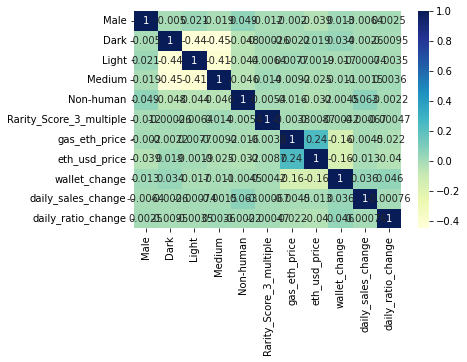

In [ ]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

# import file with data
# data = pd.read_csv("C:\\Users\\Vanshi\\Desktop\\bestsellers.csv")

# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())

# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
mp.show()


# Hedonic Regression

## Histogram

## 2017-2021

In [ ]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,daily_sales_change,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1620.798571,1,0,0,0,0,326.85,2017-06-23,0.42,777.214286
15,29,29,2017-06-23,1406,166,0.01,3134,Human,Male,Medium,...,1620.798571,1,0,0,1,0,326.85,2017-06-23,0.42,777.214286
14,28,28,2017-06-23,166,4722,0.10,5056,Human,Male,Albino,...,1620.798571,1,0,0,0,0,326.85,2017-06-23,0.42,777.214286
13,26,26,2017-06-23,1406,1218,0.06,6208,Human,Male,Medium,...,1620.798571,1,0,0,1,0,326.85,2017-06-23,0.42,777.214286
12,24,24,2017-06-23,1406,2518,0.20,5545,Human,Female,Albino,...,1620.798571,0,0,0,0,0,326.85,2017-06-23,0.42,777.214286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,...,-0.366519,1,0,0,0,0,1449.61,2022-07-26,1438.01,0.008067
17753,17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,...,-0.366519,0,0,0,0,0,1449.61,2022-07-26,1438.01,0.008067
17752,12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,...,-0.366519,1,0,1,0,0,1449.61,2022-07-26,1438.01,0.008067
17783,13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,...,-0.235358,0,1,0,0,0,1636.88,2022-07-27,1449.61,0.129186


In [ ]:
#Since the price of Cryptopunks' price is not stationary, we will transform the price into log price
df_cryp['Log_price']=np.log(np.array(df_cryp['Price']))

df_cryp=df_cryp[df_cryp['Log_price']>-100000]
df_cryp=df_cryp[df_cryp['Log_price']<100000]
df_cryp=df_cryp[df_cryp['daily_sales_change']>-100000]
df_cryp=df_cryp[df_cryp['daily_sales_change']<100000]
df_cryp=df_cryp[df_cryp['wallet_change']>-100000]
df_cryp=df_cryp[df_cryp['wallet_change']<100000]

df_cryp=df_cryp[df_cryp['eth_usd_price']>-100000]
df_cryp=df_cryp[df_cryp['eth_usd_price']<1000000000]
df_cryp=df_cryp[df_cryp['gas_eth_price']>-100000]
df_cryp=df_cryp[df_cryp['gas_eth_price']<10000000000]

df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']>-100000]
df_cryp=df_cryp[df_cryp['Rarity_Score_3_multiple']<10000000]

df_cryp=df_cryp.dropna()
len(df_cryp)

<ipython-input-45-a1d017ba1cc1>:2: RuntimeWarning: divide by zero encountered in log
  df_cryp['Log_price']=np.log(np.array(df_cryp['Price']))


17204

In [ ]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp1=df_cryp.iloc[:15000,:]

In [ ]:
#conver categorical variable into factor

gender_col=df_cryp1['gender']
skin_col=df_cryp1['skin_tone']
#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp1[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp1.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp1[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp1.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1,0,0,0,0,326.85,2017-06-23,0.42,777.214286,2.282943
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.282943
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.570626
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,0,1,0,0,0,326.85,2017-06-23,0.42,777.214286,4.403207
3,7,7,2017-06-23,1406,1904,0.30,5916,Human,Male,Medium,...,1,0,0,1,0,326.85,2017-06-23,0.42,777.214286,4.585529


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp1):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp1.filter(items=train_idx, axis=0)
test_df =  df_cryp1.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 4997 4998 4999] TEST: [5000 5001 5002 ... 9997 9998 9999]
TRAIN: [   0    1    2 ... 9997 9998 9999] TEST: [10000 10001 10002 ... 14997 14998 14999]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
10000,3322,3322,2019-12-30,5117,6023,0.4349,8288,Human,Male,Dark,...,1,1,0,0,0,131.41,2019-12-30,134.55,-0.023337,4.045683
10001,3949,3949,2019-12-30,5117,6023,0.3890,3378,Human,Male,Medium,...,1,0,0,1,0,131.41,2019-12-30,134.55,-0.023337,3.934146
10002,4016,4016,2019-12-30,3308,6023,0.3700,9453,Human,Male,Albino,...,1,0,0,0,0,131.41,2019-12-30,134.55,-0.023337,3.884070
10003,4312,4312,2019-12-30,1892,1745,1.5000,3543,Human,Male,Light,...,1,0,1,0,0,131.41,2019-12-30,134.55,-0.023337,5.283787
10004,4987,4987,2019-12-30,3854,6023,0.4200,7281,Human,Male,Dark,...,1,1,0,0,0,131.41,2019-12-30,134.55,-0.023337,4.010822


In [ ]:
cols_R = ['Log_price','Dark','Light','Medium','Non-human','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Non-human,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price,daily_ratio_change
10000,4.045683,1,0,0,0,1,Dark,8.5,3.556549,91.282717,5.035276e+07,131.41,-0.023337
10001,3.934146,0,0,1,0,1,Medium,8.5,3.556549,0.000000,5.035276e+07,131.41,-0.023337
10002,3.884070,0,0,0,0,1,Albino,8.5,3.556549,49.506087,5.035276e+07,131.41,-0.023337
10003,5.283787,0,1,0,0,1,Light,8.5,3.556549,419.371852,5.035276e+07,131.41,-0.023337
10004,4.010822,1,0,0,0,1,Dark,8.5,3.556549,20.507157,5.035276e+07,131.41,-0.023337


In [ ]:
def mul_lr():   
    
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Non-human','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Non-human','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    # the intercept after training 
    print (linreg.intercept_)
    # the weights
    print (linreg.coef_)
mul_lr()

X_train.shape=(8967, 11)
 y_train.shape =(8967, 1)
 X_test.shape=(3773, 11)
,  y_test.shape=(3773, 1)
LinearRegression()
[5.15979244]
[[-1.58059903e-01 -9.81745161e-02 -1.24261686e-01  2.40245262e+00
  -1.17759681e-01 -5.12791483e-02  2.06273668e-02  7.80242490e-05
   1.54825741e-09  2.21536929e-03 -4.57218772e-02]]


In [ ]:
y = np.array(df_cryp1['Log_price']) 
X = np.array(df_cryp1[['Dark','Light','Medium','Non-human','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     4920.
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:51:18   Log-Likelihood:                -27481.
No. Observations:               15000   AIC:                         5.499e+04
Df Residuals:                   14988   BIC:                         5.508e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9553      0.051     96.529      0.0

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

df_R_train['Non_human']=df_R_train['Non-human']

#x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
#y = [0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7]
#d = { "x": pd.Series(x), "y": pd.Series(y)}
#df = pd.DataFrame(d)
#df['xsqr'] = df['x']**2  
mod = smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+Rarity_Score_3_multiple',data=df_R_train)
res = mod.fit()
print(res.summary())


mod2= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price+daily_ratio_change',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

dfoutput = summary_col([res,res2,res3],stars=True)
print(dfoutput)

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.753
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.45e-08
Time:                        04:51:18   Log-Likelihood:                -22311.
No. Observations:                8967   AIC:                         4.464e+04
Df Residuals:                    8960   BIC:                         4.469e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<ipython-input-52-2e1eb70d9902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_R_train['Non_human']=df_R_train['Non-human']



                        Log_price I Log_price II Log_price III
--------------------------------------------------------------
Dark                    -0.0598     -0.0895      -0.0914      
                        (0.1168)    (0.1112)     (0.1112)     
Intercept               10.3099***  9.7017***    9.7006***    
                        (0.1117)    (0.1160)     (0.1159)     
Light                   -0.1074     -0.1621      -0.1699      
                        (0.1187)    (0.1130)     (0.1129)     
Male                    -0.3804***  -0.3645***   -0.3637***   
                        (0.0654)    (0.0622)     (0.0621)     
Medium                  -0.2342**   -0.2851**    -0.2889**    
                        (0.1182)    (0.1125)     (0.1124)     
Non_human               1.0227**    1.1128***    1.0440**     
                        (0.4382)    (0.4171)     (0.4173)     
R-squared               0.0052      0.0995       0.1008       
R-squared Adj.          0.0045      0.0986       0.099

## 2021-2022

In [ ]:
df_cryp=df_cryp.dropna()
len(df_cryp)

17204

In [ ]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp2=df_cryp.iloc[15000:,:]
print(df_cryp2.index)

Int64Index([ 7016,  7017,  7000,  7019,  6999,  6998,  6987,  7011,  7037,
             7010,
            ...
            15984, 15982, 15981, 15980, 15985, 17754, 17753, 17752, 17783,
            17784],
           dtype='int64', length=2204)


In [ ]:
gender_col=df_cryp2['gender']
skin_col=df_cryp2['skin_tone']

In [ ]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp2[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp2.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp2[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp2.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
7016,14869,14869,2021-12-24,2642,168,89.95,3021,Human,Male,Medium,...,1,0,0,1,0,4047.87,2021-12-24,4112.35,-0.01568,12.805200
7017,15023,15023,2021-12-24,3096,1894,59.95,9598,Human,Female,Dark,...,0,1,0,0,0,4047.87,2021-12-24,4112.35,-0.01568,12.399457
7000,10541,10541,2021-12-24,3099,5447,75.90,5543,Human,Male,Medium,...,1,0,0,1,0,4047.87,2021-12-24,4112.35,-0.01568,12.635363
7019,15520,15520,2021-12-24,2888,1036,75.00,9853,Human,Male,Light,...,1,0,1,0,0,4047.87,2021-12-24,4112.35,-0.01568,12.623434
6999,10292,10292,2021-12-24,3206,2408,76.00,6196,Human,Male,Light,...,1,0,1,0,0,4047.87,2021-12-24,4112.35,-0.01568,12.636679


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp2):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp2.filter(items=train_idx, axis=0)
test_df =  df_cryp2.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
1858,3919,3919,2022-04-26,77,4925,80.00,1252,Human,Male,Medium,...,1,0,0,1,0,2809.6,2022-04-26,3006.45,-0.065476,12.322824
1859,4214,4214,2022-04-26,1300,2890,61.94,3399,Human,Female,Medium,...,0,0,0,1,0,2809.6,2022-04-26,3006.45,-0.065476,12.066964
1860,7635,7635,2022-04-26,3035,5395,61.30,2228,Human,Male,Light,...,1,0,1,0,0,2809.6,2022-04-26,3006.45,-0.065476,12.056577
1861,7685,7685,2022-04-26,261,1041,77.77,8915,Human,Male,Light,...,1,0,1,0,0,2809.6,2022-04-26,3006.45,-0.065476,12.294553
1862,8403,8403,2022-04-26,678,4291,61.98,9770,Human,Female,Medium,...,0,0,0,1,0,2809.6,2022-04-26,3006.45,-0.065476,12.067609


In [ ]:
cols_R = ['Log_price','Dark','Light','Medium','Non-human','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,Dark,Light,Medium,Non-human,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price,daily_ratio_change
1858,12.322824,0,0,1,0,1,Medium,-0.48,0.026568,0.000000,2.128864e+08,2809.6,-0.065476
1859,12.066964,0,0,1,0,0,Medium,-0.48,0.026568,52.353219,2.128864e+08,2809.6,-0.065476
1860,12.056577,0,1,0,0,1,Light,-0.48,0.026568,21.959690,2.128864e+08,2809.6,-0.065476
1861,12.294553,0,1,0,0,1,Light,-0.48,0.026568,0.000000,2.128864e+08,2809.6,-0.065476
1862,12.067609,0,0,1,0,0,Medium,-0.48,0.026568,108.796318,2.128864e+08,2809.6,-0.065476


In [ ]:
def mul_lr():   
    
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    print (linreg.intercept_)
    print (linreg.coef_)
mul_lr()

X_train.shape=(3, 10)
 y_train.shape =(3, 1)
 X_test.shape=(36, 10)
,  y_test.shape=(36, 1)
LinearRegression()
[16.14266561]
[[-3.30681663e-18  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.10390645e-04  0.00000000e+00
  -1.29502090e-03  0.00000000e+00]]


In [ ]:
y = np.array(df_cryp2['Price']) 
X = np.array(df_cryp2[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     20.62
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           5.64e-37
Time:                        04:51:18   Log-Likelihood:                -32137.
No. Observations:                2204   AIC:                         6.430e+04
Df Residuals:                    2193   BIC:                         6.436e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.447e+05   4.98e+04      2.904      0.0

In [ ]:
df_R_train

,Log_price,Dark,Light,Medium,Non-human,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price,daily_ratio_change
836,12.254117,0,1,0,0,1,Light,-0.571429,-0.582692,338.468339,1.812064e+08,3041.21,0.006437
837,12.163145,0,1,0,0,1,Light,-0.571429,-0.582692,20.555967,1.812064e+08,3041.21,0.006437
838,12.296677,0,1,0,0,1,Light,-0.571429,-0.582692,122.148458,1.812064e+08,3041.21,0.006437


In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

df_R_train['Non_human']=df_R_train['Non-human']

#x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
#y = [0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7]
#d = { "x": pd.Series(x), "y": pd.Series(y)}
#df = pd.DataFrame(d)
#df['xsqr'] = df['x']**2  
mod = smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+Rarity_Score_3_multiple',data=df_R_train)
res = mod.fit()
print(res.summary())


mod2= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price+daily_ratio_change',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

dfoutput = summary_col([res,res2,res3],stars=True)
print(dfoutput)

                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                 -0.498
Method:                 Least Squares   F-statistic:                    0.3348
Date:                Sun, 05 Mar 2023   Prob (F-statistic):              0.666
Time:                        04:51:18   Log-Likelihood:                 4.8399
No. Observations:                   3   AIC:                            -5.680
Df Residuals:                       1   BIC:                            -7.483
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

<ipython-input-62-2e1eb70d9902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_R_train['Non_human']=df_R_train['Non-human']
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 s

## 2017-2022

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
df_cryp.sort_values('timestamp',inplace=True)
df_cryp=df_cryp.dropna()
df_cryp

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1,0,0,0,0,326.85,2017-06-23,0.42,777.214286,2.282943
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,0,0,1,0,0,326.85,2017-06-23,0.42,777.214286,4.180063
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.282943
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.570626
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,0,1,0,0,0,326.85,2017-06-23,0.42,777.214286,4.403207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,17613,17613,2022-07-26,3002,1044,94.90,5600,Human,Male,Albino,...,1,0,0,0,0,1449.61,2022-07-26,1438.01,0.008067,11.831874
17753,17440,17440,2022-07-26,5318,4950,69.00,4430,Human,Female,Albino,...,0,0,0,0,0,1449.61,2022-07-26,1438.01,0.008067,11.513156
17752,12450,12450,2022-07-26,980,1939,94.00,9099,Human,Male,Light,...,1,0,1,0,0,1449.61,2022-07-26,1438.01,0.008067,11.822345
17783,13214,13214,2022-07-27,3096,1028,69.69,6221,Human,Female,Dark,...,0,1,0,0,0,1636.88,2022-07-27,1449.61,0.129186,11.644604


In [ ]:
df_cryp.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'date_x', 'from', 'to', 'eth_price',
       'punk_id', 'type', 'gender', 'skin_tone', 'attr_count', 'attributes',
       'skin_tone_color', 'img_url', 'Rarity_Score_1_rarest',
       'Rarity_Score_2_Average', 'Rarity_Score_3_multiple', 'timestamp',
       'date_y', 'gas_eth_price', 'date_x', 'eth_usd_price', 'Price',
       'active_wallet', 'date_y', 'active_wallet_shift', 'wallet_change',
       'daily_sales', 'date_z_x', 'sales_shift', 'daily_sales_change', 'Male',
       'Dark', 'Light', 'Medium', 'Non-human', 'daily_ratio', 'date_z_y',
       'ratio_shift', 'daily_ratio_change', 'Log_price'],
      dtype='object')

In [ ]:
gender_col=df_cryp['gender']
skin_col=df_cryp['skin_tone']

In [ ]:
#conver categorical variable into factor

#cat_cols = df_cryp.select_dtypes(include=['object','category']).columns
dummies = pd.get_dummies(gender_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()


dummies = pd.get_dummies(skin_col, drop_first=True)
df_cryp[dummies.columns] = dummies
#df_cryp.drop(cat_cols, axis=1, inplace=True)
df_cryp.head()

,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
0,0,0,2017-06-23,1406,1218,0.03,6548,Human,Male,Albino,...,1,0,0,0,0,326.85,2017-06-23,0.42,777.214286,2.282943
4,9,9,2017-06-23,1406,888,0.20,4641,Human,Female,Light,...,0,0,1,0,0,326.85,2017-06-23,0.42,777.214286,4.180063
8,15,15,2017-06-23,1406,1218,0.03,5621,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.282943
1,2,2,2017-06-23,1406,1218,0.04,5719,Human,Female,Medium,...,0,0,0,1,0,326.85,2017-06-23,0.42,777.214286,2.570626
2,4,4,2017-06-23,1406,2518,0.25,1841,Human,Female,Dark,...,0,1,0,0,0,326.85,2017-06-23,0.42,777.214286,4.403207


In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)   
 
train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 5733 5734 5735] TEST: [ 5736  5737  5738 ... 11467 11468 11469]
TRAIN: [    0     1     2 ... 11467 11468 11469] TEST: [11470 11471 11472 ... 17201 17202 17203]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Male,Dark,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price
11470,1249,1249,2021-08-16,161,1360,80.00,7468,Human,Male,Light,...,1,0,1,0,0,3147.63,2021-08-16,3311.12,-0.049376,12.436432
11471,3687,3687,2021-08-16,2878,5634,56.89,3327,Human,Male,Albino,...,1,0,0,0,0,3147.63,2021-08-16,3311.12,-0.049376,12.095525
11472,4353,4353,2021-08-16,4284,3096,41.50,4414,Human,Male,Dark,...,1,1,0,0,0,3147.63,2021-08-16,3311.12,-0.049376,11.780098
11473,6216,6216,2021-08-16,2530,2521,45.00,6678,Human,Female,Light,...,0,0,1,0,0,3147.63,2021-08-16,3311.12,-0.049376,11.861068
11474,6304,6304,2021-08-16,5950,5172,48.50,2863,Human,Male,Dark,...,1,1,0,0,0,3147.63,2021-08-16,3311.12,-0.049376,11.935969


In [ ]:
cols_R = ['Log_price','Dark','Light','Medium','Non-human','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']
cols_R

['Log_price',
 'Dark',
 'Light',
 'Medium',
 'Non-human',
 'Male',
 'skin_tone',
 'wallet_change',
 'daily_sales_change',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price',
 'daily_ratio_change']

In [ ]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()
df_R_train.head()

,Log_price,Dark,Light,Medium,Non-human,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price,daily_ratio_change
0,2.282943,0,0,0,0,1,Albino,10.333333,1620.798571,0.000000,1.720330e+08,326.85,777.214286
1,2.570626,0,0,1,0,0,Medium,10.333333,1620.798571,891.396281,1.720330e+08,326.85,777.214286
2,4.403207,1,0,0,0,0,Dark,10.333333,1620.798571,69.188677,1.720330e+08,326.85,777.214286
3,4.585529,0,0,1,0,1,Medium,10.333333,1620.798571,28.734107,1.720330e+08,326.85,777.214286
4,4.180063,0,1,0,0,0,Light,10.333333,1620.798571,484.728383,1.720330e+08,326.85,777.214286


In [ ]:
def mul_lr():   
    
    X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    print (linreg.intercept_)
    print (linreg.coef_)
mul_lr()

X_train.shape=(11159, 10)
 y_train.shape =(11159, 1)
 X_test.shape=(5465, 10)
,  y_test.shape=(5465, 1)
LinearRegression()
[5.84898022]
[[-2.88690412e-01 -2.25753375e-01 -2.21919895e-01 -1.36373863e-01
  -3.70930182e-02 -5.87515751e-03  6.43544184e-05  1.05560855e-09
   2.12116221e-03  8.75410832e-03]]


RMSE by hand: [1.90928499]


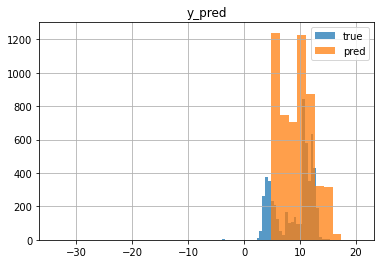

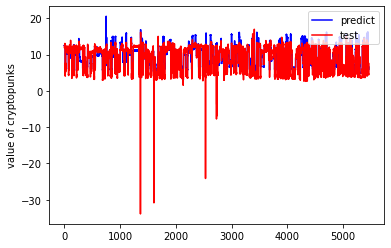

In [ ]:
X_train = pd.DataFrame(df_R_train,columns=['Dark','Light','Medium','Non-human','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['Dark','Light','Medium','Non-human','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
y_test = pd.DataFrame(df_R_test['Log_price'])

mdl = linear_model.LinearRegression().fit(X_train,y_train)
y_pred = pd.DataFrame(np.array(mdl.predict(X_test)).astype(float),columns=['y_pred'])

#prediction graph
fig, ax = plt.subplots()
y_test.hist(ax=ax, label='true', alpha=.75,bins=100)
y_pred.hist(ax=ax, label='pred', alpha=.75)
ax.legend()
fig.show()

#evaluate regression model performance Root Mean Squared Error, RMSE
y_pred=y_pred.values.tolist()
sum_mean=0
for i in range(len(y_pred)):
  sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/len(y_pred))  
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)
#ROC curve
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict",alpha=1)
plt.plot(range(len(y_pred)),y_test,'r',label="test",alpha=1)
plt.legend(loc="upper right") 
#plt.xlabel("the number of sales")
plt.ylabel('value of cryptopunks')
plt.show()

In [ ]:
y = np.array(df_cryp['Price']) 
X = np.array(df_cryp[['Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     355.5
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:54:25   Log-Likelihood:            -2.3864e+05
No. Observations:               17204   AIC:                         4.773e+05
Df Residuals:                   17193   BIC:                         4.774e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.427e+04   8016.121      1.781      0.0

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

df_R_train['Non_human']=df_R_train['Non-human']

#x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
#y = [0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7]
#d = { "x": pd.Series(x), "y": pd.Series(y)}
#df = pd.DataFrame(d)
#df['xsqr'] = df['x']**2  
mod = smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+Rarity_Score_3_multiple',data=df_R_train)
res = mod.fit()
print(res.summary())


mod2= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price+daily_ratio_change',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

dfoutput = summary_col([res,res2,res3],stars=True)
print(dfoutput)

<ipython-input-78-2e1eb70d9902>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_R_train['Non_human']=df_R_train['Non-human']


                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     10.29
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.18e-11
Time:                        04:54:28   Log-Likelihood:                -27898.
No. Observations:               11159   AIC:                         5.581e+04
Df Residuals:                   11152   BIC:                         5.586e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

# Sentiment Regression

In [ ]:
df_sentiment=pd.read_csv("https://raw.githubusercontent.com/HCI-Blockchain/ICWSM-2023/main/data/analyzed_price%20regression/CryptoPunk_Sentiment%20Score%20Polarity_NAdroped.csv")
df_sentiment=df_sentiment[['date','polarity']]
df_sentiment

,date,polarity
0,2017-08-10,1.000000
1,2017-08-14,-1.000000
2,2017-08-31,1.000000
3,2017-09-01,-1.000000
4,2017-09-04,-1.000000
...,...,...
261,2021-07-18,0.000000
262,2021-07-19,0.714286
263,2021-07-20,0.600000
264,2021-07-21,0.200000


In [ ]:
df_cryp['date_z_y']

0        2017-06-23
4        2017-06-23
8        2017-06-23
1        2017-06-23
2        2017-06-23
            ...    
17754    2022-07-26
17753    2022-07-26
17752    2022-07-26
17783    2022-07-27
17784    2022-07-27
Name: date_z_y, Length: 17204, dtype: object

In [ ]:
df_cryp = df_cryp.merge(df_sentiment, left_on='date_z_y',
                      right_on='date')
df_cryp=df_cryp.dropna()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit()
print(tss)

# change the train and test split parameters 
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)

for train_idx, test_idx in tss.split(df_cryp):
    print("TRAIN:", train_idx, "TEST:", test_idx)
train_df = df_cryp.filter(items=train_idx, axis=0)
test_df =  df_cryp.filter(items=test_idx, axis=0)   

train_df.head()
test_df.head()

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
TRAIN: [   0    1    2 ... 1926 1927 1928] TEST: [1929 1930 1931 ... 3854 3855 3856]
TRAIN: [   0    1    2 ... 3854 3855 3856] TEST: [3857 3858 3859 ... 5782 5783 5784]


,Unnamed: 0,Unnamed: 0.1,date_x,from,to,eth_price,punk_id,type,gender,skin_tone,...,Light,Medium,Non-human,daily_ratio,date_z_y,ratio_shift,daily_ratio_change,Log_price,date,polarity
3857,13908,13908,2021-04-12,179,5795,19.99,7556,Human,Female,Medium,...,0,1,0,2137.79,2021-04-12,2150.54,-0.005929,10.662760,2021-04-12,0.75
3858,13896,13896,2021-04-12,1727,1246,23.95,2878,Human,Male,Dark,...,0,0,0,2137.79,2021-04-12,2150.54,-0.005929,10.843496,2021-04-12,0.75
3859,13866,13866,2021-04-12,1406,989,25.40,6113,Human,Female,Dark,...,0,0,0,2137.79,2021-04-12,2150.54,-0.005929,10.902277,2021-04-12,0.75
3860,13889,13889,2021-04-12,3392,5721,27.99,6896,Human,Female,Albino,...,0,0,0,2137.79,2021-04-12,2150.54,-0.005929,10.999375,2021-04-12,0.75
3861,13913,13913,2021-04-12,3392,1067,34.99,9481,Human,Female,Dark,...,0,0,0,2137.79,2021-04-12,2150.54,-0.005929,11.222590,2021-04-12,0.75


In [ ]:
cols_R = ['Log_price','polarity','Dark','Light','Non-human','Medium','Male','skin_tone','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']
cols_R

['Log_price',
 'polarity',
 'Dark',
 'Light',
 'Non-human',
 'Medium',
 'Male',
 'skin_tone',
 'wallet_change',
 'daily_sales_change',
 'Rarity_Score_3_multiple',
 'gas_eth_price',
 'eth_usd_price',
 'daily_ratio_change']

In [ ]:
df_R_train = train_df[cols_R]
df_R_test = test_df[cols_R]
df_R_test.head()

,Log_price,polarity,Dark,Light,Non-human,Medium,Male,skin_tone,wallet_change,daily_sales_change,Rarity_Score_3_multiple,gas_eth_price,eth_usd_price,daily_ratio_change
3857,10.662760,0.75,0,0,0,1,0,Medium,-0.018182,-0.074194,14.853675,4.589860e+08,2137.79,-0.005929
3858,10.843496,0.75,1,0,0,0,1,Dark,-0.018182,-0.074194,200.561128,4.589860e+08,2137.79,-0.005929
3859,10.902277,0.75,1,0,0,0,0,Dark,-0.018182,-0.074194,117.815767,4.589860e+08,2137.79,-0.005929
3860,10.999375,0.75,0,0,0,0,0,Albino,-0.018182,-0.074194,0.000000,4.589860e+08,2137.79,-0.005929
3861,11.222590,0.75,1,0,0,0,0,Dark,-0.018182,-0.074194,418.559172,4.589860e+08,2137.79,-0.005929


In [ ]:
X_train = pd.DataFrame(df_R_train,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
y_train = pd.DataFrame(df_R_train['Log_price'])
X_test = pd.DataFrame(df_R_test,columns=['polarit','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
y_test = pd.DataFrame(df_R_test['Log_price'])

In [ ]:
def mul_lr():   
    X_train = pd.DataFrame(df_R_train,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_train = pd.DataFrame(df_R_train['Log_price'])
    X_test = pd.DataFrame(df_R_test,columns=['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change'])
    y_test = pd.DataFrame(df_R_test['Log_price'])
    #X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=100)
    print ('X_train.shape={}\n y_train.shape ={}\n X_test.shape={}\n,  y_test.shape={}'.format(X_train.shape,y_train.shape, X_test.shape,y_test.shape))
    linreg = LinearRegression()
    model=linreg.fit(X_train, y_train)
    print (model)
    print (linreg.intercept_)
    print (linreg.coef_)
mul_lr()

X_train.shape=(3857, 11)
 y_train.shape =(3857, 1)
 X_test.shape=(1928, 11)
,  y_test.shape=(1928, 1)
LinearRegression()
[6.18077468]
[[-9.37809270e-02 -2.88971065e-01 -1.79541058e-01 -2.12735021e-01
  -1.62287971e-01 -4.04063308e-02  2.04907982e-02  2.21970589e-05
   5.78779302e-10  2.34452209e-03 -2.53818327e+00]]


In [ ]:
df_cryp.describe()

,Unnamed: 0,Unnamed: 0.1,from,to,eth_price,punk_id,attr_count,Rarity_Score_1_rarest,Rarity_Score_2_Average,Rarity_Score_3_multiple,...,Male,Dark,Light,Medium,Non-human,daily_ratio,ratio_shift,daily_ratio_change,Log_price,polarity
count,5785.000000,5785.000000,5785.000000,5785.000000,5.785000e+03,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,...,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000,5785.000000
mean,9566.361452,9566.361452,3131.734659,3225.413483,2.552626e+01,5335.916508,2.792913,10.979948,6.362930,204.310132,...,0.672947,0.300605,0.299049,0.304235,0.004322,1966.284501,1949.255196,0.008352,10.390525,0.492641
std,4142.418774,4142.418774,1797.595830,1842.664804,6.252273e+01,2698.139442,0.737729,11.264446,5.006478,2398.788085,...,0.469177,0.458561,0.457881,0.460122,0.065602,686.942393,661.691966,0.057439,1.474345,0.518923
min,34.000000,34.000000,3.000000,8.000000,4.000000e-17,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,93.610000,90.430000,-0.276749,-30.256703,-1.000000
25%,6527.000000,6527.000000,1566.000000,1564.000000,1.500000e+01,3056.000000,2.000000,4.928729,3.647085,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1778.070000,1779.400000,-0.021635,10.292424,0.333333
50%,10595.000000,10595.000000,3096.000000,3190.000000,2.140000e+01,5348.000000,3.000000,7.390420,4.889871,32.992221,...,1.000000,0.000000,0.000000,0.000000,0.000000,1899.960000,1915.120000,0.009208,10.642912,0.600000
75%,12939.000000,12939.000000,4738.000000,4844.000000,2.699000e+01,7662.000000,3.000000,12.299445,7.374069,108.528893,...,1.000000,1.000000,1.000000,1.000000,0.000000,2150.540000,2140.450000,0.038315,11.000349,1.000000
max,15487.000000,15487.000000,6434.000000,6434.000000,4.200000e+03,9998.000000,6.000000,100.000000,77.811760,163669.688714,...,1.000000,1.000000,1.000000,1.000000,1.000000,4181.280000,4181.280000,0.279043,15.853303,1.000000


In [ ]:
y = np.array(df_cryp['Log_price']) 
X = np.array(df_cryp[['polarity','Dark','Light','Medium','Male','wallet_change','daily_sales_change','Rarity_Score_3_multiple','gas_eth_price','eth_usd_price','daily_ratio_change']]) 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     364.6
Date:                Sun, 05 Mar 2023   Prob (F-statistic):               0.00
Time:                        04:54:54   Log-Likelihood:                -8928.2
No. Observations:                5785   AIC:                         1.788e+04
Df Residuals:                    5773   BIC:                         1.796e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7909      0.075    103.567      0.0

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col

df_R_train['Non_human']=df_R_train['Non-human']

#x = [1, 3, 5, 6, 8, 3, 4, 5, 1, 3, 5, 6, 8, 3, 4, 5, 0, 1, 0, 1, 1, 4, 5, 7]
#y = [0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7, 0, 1, 0, 1, 1, 4, 5, 7]
#d = { "x": pd.Series(x), "y": pd.Series(y)}
#df = pd.DataFrame(d)
#df['xsqr'] = df['x']**2  
mod = smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+Rarity_Score_3_multiple',data=df_R_train)
res = mod.fit()
print(res.summary())


mod2= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price',data=df_R_train)
res2 = mod2.fit()
print(res2.summary())

mod3= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price+daily_ratio_change',data=df_R_train)
res3 = mod3.fit()
print(res3.summary())

mod4= smf.ols('Log_price ~ Dark+Light+Medium+Non_human+Male+wallet_change+daily_sales_change+Rarity_Score_3_multiple+gas_eth_price+daily_ratio_change+polarity',data=df_R_train)
res4 = mod4.fit()
print(res4.summary())

dfoutput = summary_col([res,res2,res3,res4],stars=True)
print(dfoutput)

<ipython-input-90-b8f68979fc06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_R_train['Non_human']=df_R_train['Non-human']


                            OLS Regression Results                            
Dep. Variable:              Log_price   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     12.61
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.91e-14
Time:                        04:57:23   Log-Likelihood:                -7435.3
No. Observations:                3857   AIC:                         1.488e+04
Df Residuals:                    3850   BIC:                         1.493e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 